In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import math

In [61]:
ph_results_df = pd.read_csv('finalResults_ph.csv')

In [62]:
ph_results_df.head()

,Unnamed: 0,Participant_ID,Baseline_HR,Baseline_GSR,Pretest_Time,Pretest_Mistake_Time,Pretest_GSR,Pretest_HR,Level_1_Time,Level_1_Mistake_Time,...,Level_3_HR,Level_3_GSR,Level_4_Time,Level_4_Mistake_Time,Level_4_HR,Level_4_GSR,Posttest_Time,Posttest_Mistake_Time,Posttest_GSR,Posttest_HR
0,0,2C0804,66.014706,5.098206,8.458740,2.276493,10.258958,65.666667,5.110225,0.961844,...,60.444444,12.082032,8.019757,1.238242,76.000000,12.711438,8.757860,2.793538,13.663014,67.600000
1,1,2C0803,78.797521,4.517196,13.213282,2.032064,10.820270,82.235294,6.530196,0.000000,...,78.400000,12.985760,11.389664,0.872140,77.937500,12.524012,14.340231,2.058856,14.863311,82.631579
2,2,2C0802,53.027322,0.568230,23.835914,4.948266,0.732314,55.880000,10.697470,0.169826,...,52.444444,0.867310,15.386138,3.922399,62.533333,1.011710,13.338316,3.795558,1.560167,60.214286
3,3,2C0801,76.421053,4.885489,22.537037,2.322484,7.559679,85.878788,9.287472,0.130671,...,77.545455,12.029860,18.323262,0.779437,78.695652,12.927031,27.859444,1.052882,13.810460,83.846154
4,4,2C0704,61.470588,0.394222,26.010274,2.991700,0.473938,75.156250,10.234093,0.234108,...,66.812500,0.776192,9.983448,2.098705,78.071429,0.330589,18.879906,3.869818,0.753636,67.727273


In [63]:
#Normalize the data
ph_results_df['Norm_Pretest_HR'] = ph_results_df['Pretest_HR'] - ph_results_df['Baseline_HR']/ph_results_df['Baseline_HR']
ph_results_df['Norm_Pretest_GSR'] = ph_results_df['Pretest_GSR'] - ph_results_df['Baseline_GSR']/ph_results_df['Baseline_GSR']

ph_results_df['Norm_Level_1_HR'] = ph_results_df['Level_1_HR'] - ph_results_df['Baseline_HR']/ph_results_df['Baseline_HR']
ph_results_df['Norm_Level_1_GSR'] = ph_results_df['Level_1_GSR'] - ph_results_df['Baseline_GSR']/ph_results_df['Baseline_GSR']

ph_results_df['Norm_Level_2_HR'] = ph_results_df['Level_2_HR'] - ph_results_df['Baseline_HR']/ph_results_df['Baseline_HR']
ph_results_df['Norm_Level_2_GSR'] = ph_results_df['Level_2_GSR'] - ph_results_df['Baseline_GSR']/ph_results_df['Baseline_GSR']

ph_results_df['Norm_Level_3_HR'] = ph_results_df['Level_3_HR'] - ph_results_df['Baseline_HR']/ph_results_df['Baseline_HR']
ph_results_df['Norm_Level_3_GSR'] = ph_results_df['Level_3_GSR'] - ph_results_df['Baseline_GSR']/ph_results_df['Baseline_GSR']

ph_results_df['Norm_Level_4_HR'] = ph_results_df['Level_4_HR'] - ph_results_df['Baseline_HR']/ph_results_df['Baseline_HR']
ph_results_df['Norm_Level_4_GSR'] = ph_results_df['Level_4_GSR'] - ph_results_df['Baseline_GSR']/ph_results_df['Baseline_GSR']

ph_results_df['Norm_Posttest_HR'] = ph_results_df['Posttest_HR'] - ph_results_df['Baseline_HR']/ph_results_df['Baseline_HR']
ph_results_df['Norm_Posttest_GSR'] = ph_results_df['Posttest_GSR'] - ph_results_df['Baseline_GSR']/ph_results_df['Baseline_GSR']

In [64]:
#Combined score metric 
ph_results_df['Norm_Pretest_Score'] = 1 / np.sqrt(ph_results_df['Pretest_Time'] * ph_results_df['Pretest_Mistake_Time'])
ph_results_df['Norm_Level_1_Score'] = 1 / np.sqrt(ph_results_df['Level_1_Time'] * ph_results_df['Level_1_Mistake_Time'])
ph_results_df['Norm_Level_2_Score'] = 1 / np.sqrt(ph_results_df['Level_2_Time'] * ph_results_df['Level_2_Mistake_Time'])
ph_results_df['Norm_Level_3_Score'] = 1 / np.sqrt(ph_results_df['Level_3_Time'] * ph_results_df['Level_3_Mistake_Time'])
ph_results_df['Norm_Level_4_Score'] = 1 / np.sqrt(ph_results_df['Level_4_Time'] * ph_results_df['Level_4_Mistake_Time'])

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

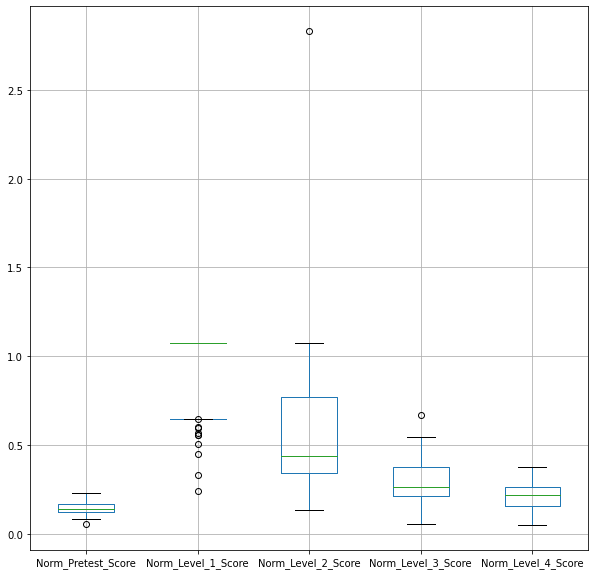

In [65]:
ph_results_df.boxplot(column=['Norm_Pretest_Score', 'Norm_Level_1_Score' , 'Norm_Level_2_Score', 'Norm_Level_3_Score', 'Norm_Level_4_Score'], figsize=(10,10))

In [66]:
ph_results_df['Norm_Level_1_HR']

0      60.800000
1      76.090909
2      50.454545
3      87.800000
4      65.333333
5      96.846154
6      61.266667
7      68.687500
8      59.600000
9      76.500000
10     83.285714
11     50.000000
12     92.700000
13     76.000000
14     80.142857
15     72.166667
16     81.500000
17     76.555556
18     72.214286
19     75.545455
20     77.619048
21     59.000000
22     60.285714
23     73.000000
24     64.250000
25     86.750000
26     90.894737
27     75.000000
28     84.125000
29     78.000000
30     52.000000
31     74.111111
32     64.700000
33     94.375000
34     84.888889
35     71.555556
36    100.200000
37     63.250000
38     64.181818
Name: Norm_Level_1_HR, dtype: float64

In [67]:
ph_results_df['Level_1_HR']

0      61.800000
1      77.090909
2      51.454545
3      88.800000
4      66.333333
5      97.846154
6      62.266667
7      69.687500
8      60.600000
9      77.500000
10     84.285714
11     51.000000
12     93.700000
13     77.000000
14     81.142857
15     73.166667
16     82.500000
17     77.555556
18     73.214286
19     76.545455
20     78.619048
21     60.000000
22     61.285714
23     74.000000
24     65.250000
25     87.750000
26     91.894737
27     76.000000
28     85.125000
29     79.000000
30     53.000000
31     75.111111
32     65.700000
33     95.375000
34     85.888889
35     72.555556
36    101.200000
37     64.250000
38     65.181818
Name: Level_1_HR, dtype: float64

In [68]:
for column in ['Baseline_GSR', 'Pretest_GSR' , 'Level_1_GSR', 'Level_2_GSR', 'Level_3_GSR', 'Level_4_GSR', 'Posttest_GSR']:
    print(stats.shapiro(ph_results_df[column]).pvalue > 0.05)

False
False
False
False
False
False
False


<AxesSubplot:>

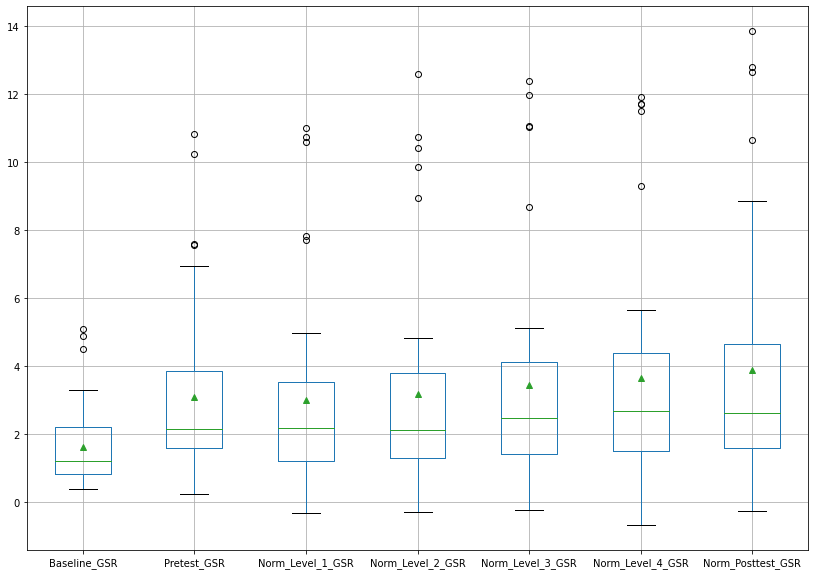

In [69]:
#Draw box plot of Baseline_HR and Baseline_GSR columns in ph_results_df
ph_results_df.boxplot(column=['Baseline_GSR', 'Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)


<AxesSubplot:>

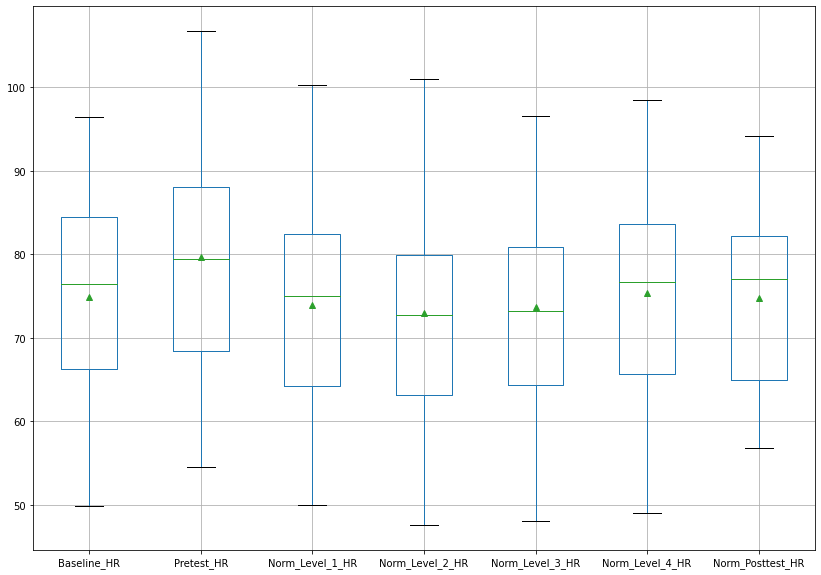

In [70]:
ph_results_df.boxplot(column=['Baseline_HR', 'Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)

<AxesSubplot:>

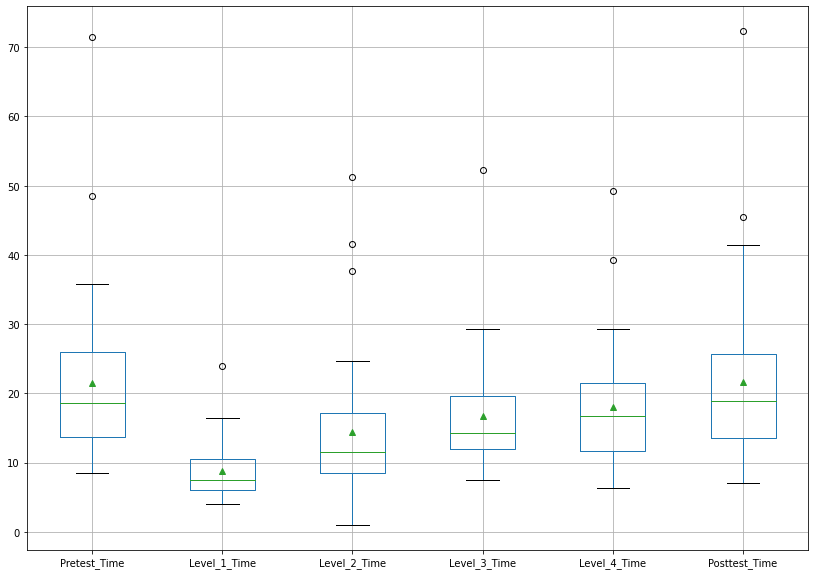

In [71]:
ph_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(14,10),showmeans=True)

<AxesSubplot:>

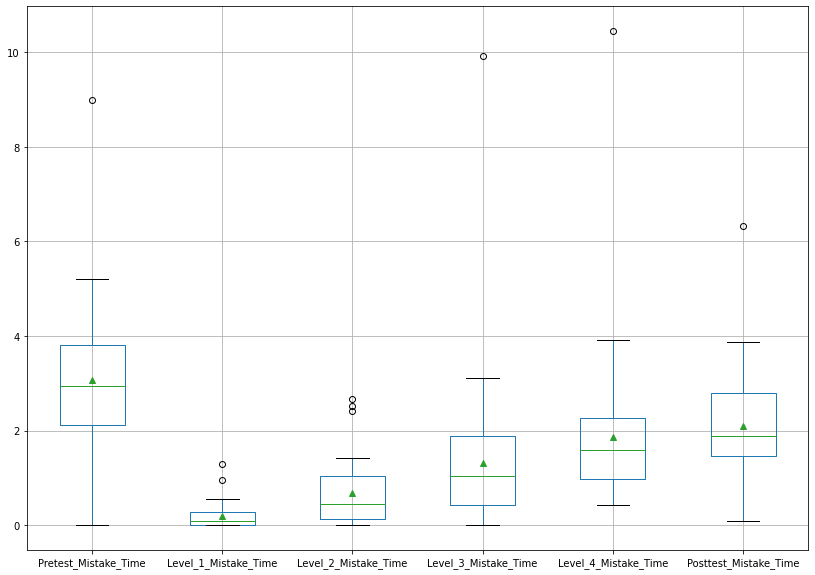

In [72]:
ph_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

## VR

In [73]:
vr_results_df = pd.read_csv('finalResults_vr.csv')

In [74]:
#Normalize the data
vr_results_df['Norm_Pretest_HR'] = vr_results_df['Pretest_HR'] - vr_results_df['Baseline_HR']/vr_results_df['Baseline_HR']
vr_results_df['Norm_Pretest_GSR'] = vr_results_df['Pretest_GSR'] - vr_results_df['Baseline_GSR']/vr_results_df['Baseline_GSR']

vr_results_df['Norm_Level_1_HR'] = vr_results_df['Level_1_HR'] - vr_results_df['Baseline_HR']/vr_results_df['Baseline_HR']
vr_results_df['Norm_Level_1_GSR'] = vr_results_df['Level_1_GSR'] - vr_results_df['Baseline_GSR']/vr_results_df['Baseline_GSR']

vr_results_df['Norm_Level_2_HR'] = vr_results_df['Level_2_HR'] - vr_results_df['Baseline_HR']/vr_results_df['Baseline_HR']
vr_results_df['Norm_Level_2_GSR'] = vr_results_df['Level_2_GSR'] - vr_results_df['Baseline_GSR']/vr_results_df['Baseline_GSR']

vr_results_df['Norm_Level_3_HR'] = vr_results_df['Level_3_HR'] - vr_results_df['Baseline_HR']/vr_results_df['Baseline_HR']
vr_results_df['Norm_Level_3_GSR'] = vr_results_df['Level_3_GSR'] - vr_results_df['Baseline_GSR']/vr_results_df['Baseline_GSR']

vr_results_df['Norm_Level_4_HR'] = vr_results_df['Level_4_HR'] - vr_results_df['Baseline_HR']/vr_results_df['Baseline_HR']
vr_results_df['Norm_Level_4_GSR'] = vr_results_df['Level_4_GSR'] - vr_results_df['Baseline_GSR']/vr_results_df['Baseline_GSR']

vr_results_df['Norm_Posttest_HR'] = vr_results_df['Posttest_HR'] - vr_results_df['Baseline_HR']/vr_results_df['Baseline_HR']
vr_results_df['Norm_Posttest_GSR'] = vr_results_df['Posttest_GSR'] - vr_results_df['Baseline_GSR']/vr_results_df['Baseline_GSR']

<AxesSubplot:>

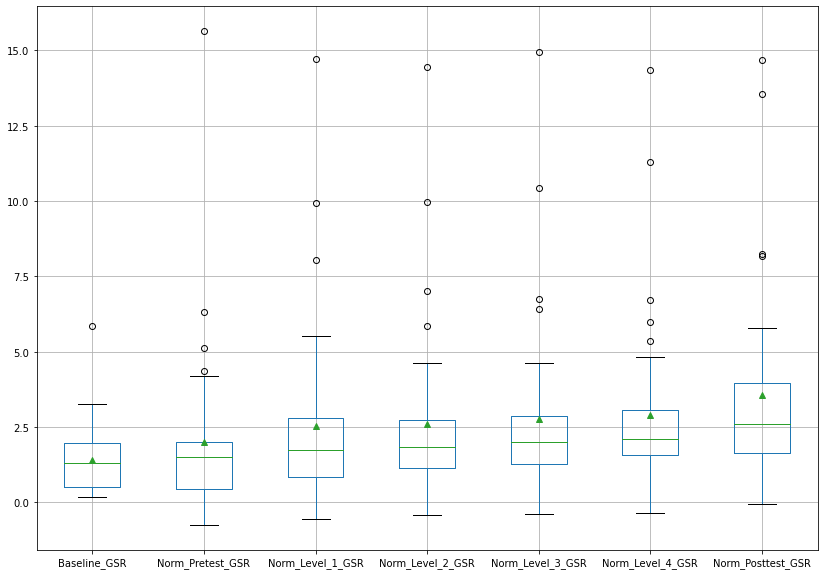

In [75]:
vr_results_df.boxplot(column=['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)

<AxesSubplot:>

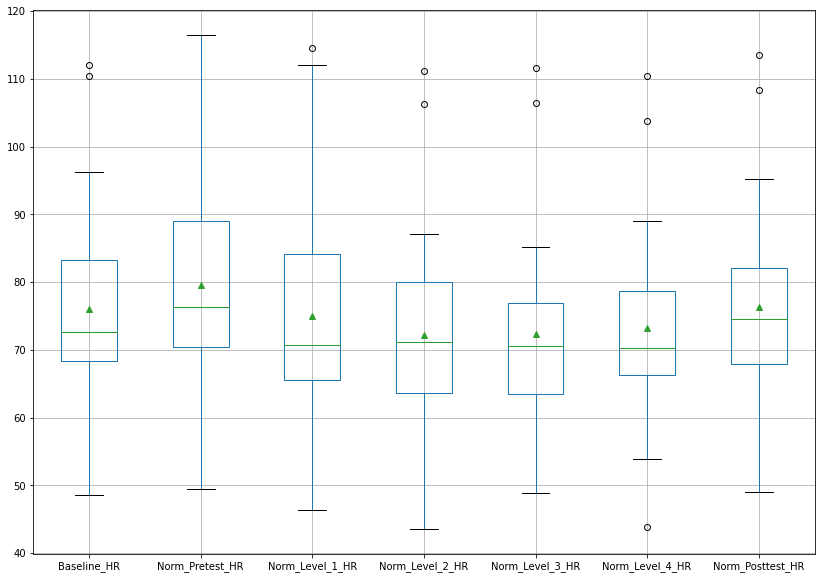

In [76]:
vr_results_df.boxplot(column=['Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)

<AxesSubplot:>

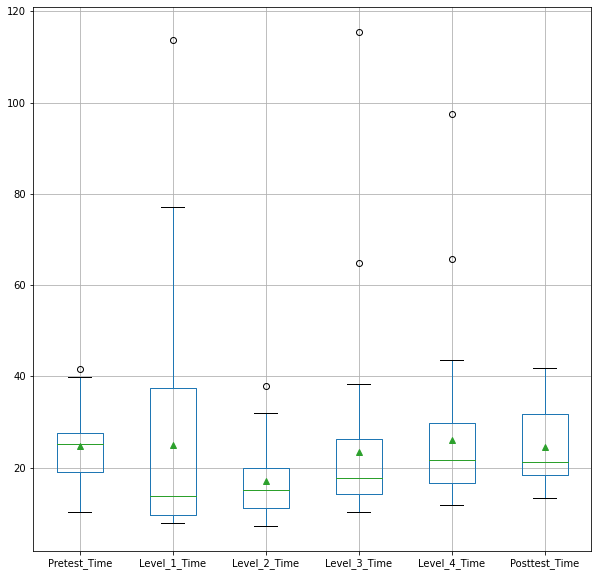

In [77]:
vr_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(10,10),showmeans=True)

<AxesSubplot:>

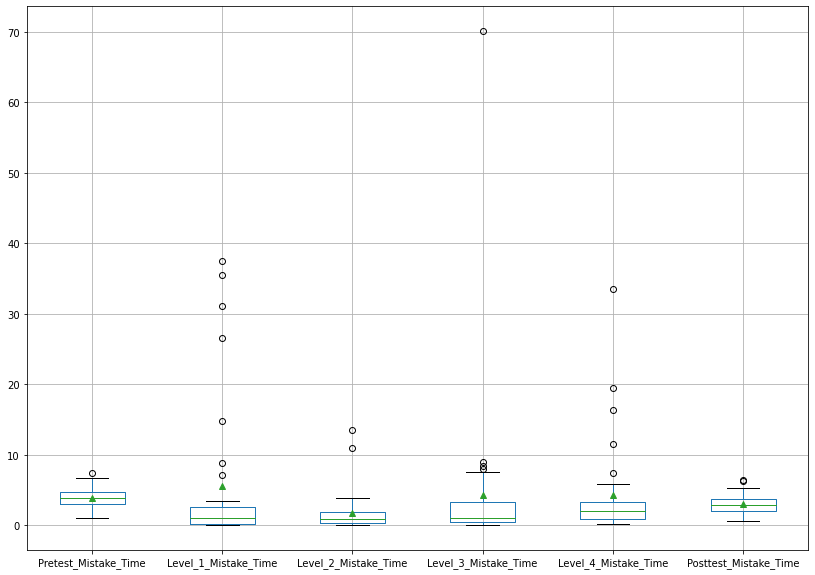

In [79]:
vr_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

VR vs Physical

In [88]:
print('Physical')
#print('Pretest_Time', ph_results_df['Pretest_Time'].mean())
#print('Level_1_Mistake_Time', ph_results_df['Level_1_Mistake_Time'].mean())
#print('Level_1_Mistake_Time', ph_results_df['Level_2_Mistake_Time'].mean())
#print('Level_1_Mistake_Time', ph_results_df['Level_3_Mistake_Time'].mean())
#print('Level_1_Mistake_Time', ph_results_df['Level_4_Mistake_Time'].mean())
#print('Posttest_Time', ph_results_df['Posttest_Time'].mean())
print('Training Average GSR ', (ph_results_df['Norm_Level_1_GSR'].mean() + ph_results_df['Norm_Level_2_GSR'].mean() + ph_results_df['Norm_Level_3_GSR'].mean() + ph_results_df['Norm_Level_4_GSR'].mean())/4)
print('Training Average HR ', (ph_results_df['Norm_Level_1_HR'].mean() + ph_results_df['Norm_Level_2_HR'].mean() + ph_results_df['Norm_Level_3_HR'].mean() + ph_results_df['Norm_Level_4_HR'].mean())/4)
print('Posttest Time Diff ', ph_results_df['Pretest_Time'].mean() - ph_results_df['Posttest_Time'].mean())
print('Posttest Mistake Time Diff ', ph_results_df['Pretest_Mistake_Time'].mean() - ph_results_df['Posttest_Mistake_Time'].mean())

print('VR')
#print('Pretest_Time', vr_results_df['Pretest_Time'].mean())
#print('Level_1_Mistake_Time', vr_results_df['Level_1_Mistake_Time'].mean())
#print('Level_1_Mistake_Time', vr_results_df['Level_2_Mistake_Time'].mean())
#print('Level_1_Mistake_Time', vr_results_df['Level_3_Mistake_Time'].mean())
#print('Level_1_Mistake_Time', vr_results_df['Level_4_Mistake_Time'].mean())
#print('Posttest_Time', vr_results_df['Posttest_Time'].mean())
print('Training Average GSR ', (vr_results_df['Norm_Level_1_GSR'].mean() + vr_results_df['Norm_Level_2_GSR'].mean() + vr_results_df['Norm_Level_3_GSR'].mean() + vr_results_df['Norm_Level_4_GSR'].mean())/4)
print('Training Average HR ', (vr_results_df['Norm_Level_1_HR'].mean() + vr_results_df['Norm_Level_2_HR'].mean() + vr_results_df['Norm_Level_3_HR'].mean() + vr_results_df['Norm_Level_4_HR'].mean())/4)
print('Posttest Time Diff ', vr_results_df['Pretest_Time'].mean() - vr_results_df['Posttest_Time'].mean())
print('Posttest Mistake Time Diff ', vr_results_df['Pretest_Mistake_Time'].mean() - vr_results_df['Posttest_Mistake_Time'].mean())

Physical
Training Average GSR  3.321065254376793
Training Average HR  73.93263629711444
Posttest Time Diff  -0.17257767948717984
Posttest Mistake Time Diff  0.9715292307692174
VR
Training Average GSR  2.704427370000659
Training Average HR  73.21465291831052
Posttest Time Diff  0.2999697151515228
Posttest Mistake Time Diff  0.9162137878789096


In [80]:
#Levene's test for equal variances
print(stats.levene(ph_results_df['Norm_Pretest_HR'], vr_results_df['Norm_Pretest_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_HR'], vr_results_df['Norm_Level_1_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_HR'], vr_results_df['Norm_Level_2_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_HR'], vr_results_df['Norm_Level_3_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_HR'], vr_results_df['Norm_Level_4_HR'], center='median'))

print(stats.levene(ph_results_df['Norm_Pretest_GSR'], vr_results_df['Norm_Pretest_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_GSR'], vr_results_df['Norm_Level_1_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_GSR'], vr_results_df['Norm_Level_2_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_GSR'], vr_results_df['Norm_Level_3_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_GSR'], vr_results_df['Norm_Level_4_GSR'], center='median'))

LeveneResult(statistic=0.16697808025801814, pvalue=0.6840589884131192)
LeveneResult(statistic=0.33632117832673725, pvalue=0.5638224903713027)
LeveneResult(statistic=0.0508243679886914, pvalue=0.8222918612260184)
LeveneResult(statistic=0.08822303085428258, pvalue=0.7673280859184222)
LeveneResult(statistic=0.00040931691439969795, pvalue=0.9839161927961279)
LeveneResult(statistic=0.009118226788387428, pvalue=0.924198941838439)
LeveneResult(statistic=2.1889459868675014e-05, pvalue=0.9962803251513453)
LeveneResult(statistic=0.15386173093001704, pvalue=0.6960637181345899)
LeveneResult(statistic=0.38021418190324163, pvalue=0.5394889197527768)
LeveneResult(statistic=0.6881646584644656, pvalue=0.40960940299630166)
